In [107]:
import matplotlib.pyplot as plt

"""
Small demo to illustrate how the plot function and the gridworld environment work
"""
import numpy as np
import optuna

from gridworld import *
from plot import *

In [ ]:
EPS = 0.1
#Hyperparameter found via optuna
ALPHA = 0.6660010689218203
GAMMA =  0.9955785729498876
EPISODES = 11620
MAX_EPISODE_LENGTH = 1544

In [ ]:
def select_action(episode, state, q_table):
    # do random action
    if np.random.random() < EPS/(0.5*(episode+1)):
        return np.random.randint(0, len(q_table[0]))
    # or do best action
    else:
        return np.argmax(q_table[state])


In [ ]:
def qlearning_episode(env):
    q_table = np.zeros((env.num_states(), env.num_actions()))
    q_table.fill(5)
    learning_data={}
    cum_reward = 0
    # run a certain number of episodes
    for episode in range(EPISODES):
        state = env.reset()
        action = select_action(episode, state, q_table)

        done = False
        episode_length = 0

        # run episode until a goal state or the maximum number of steps has been reached
        while not done and episode_length < MAX_EPISODE_LENGTH:
            next_state, reward, done = env.step(action)
            next_action = select_action(episode, next_state, q_table)

            # Q-Learning update rule
            delta = reward + GAMMA * np.max(q_table[next_state, next_action]) * (done < 0.5) - q_table[state, action]
            q_table[state, action] += ALPHA * delta
            cum_reward += ALPHA * delta
            
            state = next_state
            action = next_action
            episode_length += 1
            
        learning_data[episode] = [episode_length, cum_reward]

    return learning_data


In [122]:
def qlearning_optimize(trial):
    q_table = np.zeros((env.num_states(), env.num_actions()))
    EPISODES = trial.suggest_int('EPISODES', 1,15000)
    INIT_VALUE = trial.suggest_int('INIT_VALUE',0,5)
    MAX_EPISODE_LENGTH = trial.suggest_int('MAX_EPISODE_LENGTH',300,20000)
    GAMMA = trial.suggest_float('GAMMA', 0,1)
    ALPHA = trial.suggest_float('ALPHA', 0,1)
    q_table.fill(INIT_VALUE)

    learning_data={}
    cum_reward = 0
    # run a certain number of episodes
    for episode in range(EPISODES):
        state = env.reset()
        action = select_action(episode, state, q_table)

        done = False
        episode_length = 0

        # run episode until a goal state or the maximum number of steps has been reached
        while not done and episode_length < MAX_EPISODE_LENGTH:
            next_state, reward, done = env.step(action)
            next_action = select_action(episode, next_state, q_table)

            # Q-Learning update rule
            delta = reward + GAMMA * np.max(q_table[next_state, next_action]) * (done < 0.5) - q_table[state, action]
            q_table[state, action] += ALPHA * delta
            cum_reward += ALPHA * delta
            
            state = next_state
            action = next_action
            episode_length += 1
            
        learning_data[episode] = [episode_length, cum_reward]

    return (cum_reward/MAX_EPISODE_LENGTH)


In [ ]:
env = Random(size=12, water = 0, mountain=0.3)
for row in env.grid:
    print(row)

[' ', ' ', ' ', '#', ' ', '#', ' ', ' ', 'G', ' ', '#', ' ']
[' ', ' ', '#', '#', '#', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
['#', ' ', ' ', ' ', ' ', '#', ' ', ' ', '#', ' ', ' ', ' ']
[' ', ' ', '#', ' ', ' ', '#', ' ', ' ', ' ', ' ', ' ', ' ']
['#', '#', ' ', '#', ' ', '#', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', '#']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', '#', '#', '#', ' ', ' ']
[' ', ' ', '#', ' ', ' ', ' ', ' ', ' ', '#', ' ', '#', ' ']
['#', '#', ' ', ' ', '#', '#', ' ', ' ', ' ', ' ', ' ', '#']
[' ', ' ', ' ', ' ', '#', ' ', ' ', ' ', ' ', '#', ' ', ' ']
[' ', 'S', ' ', '#', ' ', ' ', '#', ' ', ' ', '#', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', '#', '#']


In [127]:
study = optuna.create_study()
study.optimize(qlearning_optimize, n_trials=100)

[I 2023-11-17 15:15:22,523] A new study created in memory with name: no-name-99ca5e7f-160e-461c-adfd-0aab6e539ec0
[I 2023-11-17 15:15:24,051] Trial 0 finished with value: -0.032712975277049444 and parameters: {'EPISODES': 12374, 'INIT_VALUE': 4, 'MAX_EPISODE_LENGTH': 10762, 'GAMMA': 0.6332606334487769, 'ALPHA': 0.6470433807478545}. Best is trial 0 with value: -0.032712975277049444.
[I 2023-11-17 15:15:24,345] Trial 1 finished with value: 0.06972107163115963 and parameters: {'EPISODES': 2093, 'INIT_VALUE': 1, 'MAX_EPISODE_LENGTH': 10124, 'GAMMA': 0.9853253238324485, 'ALPHA': 0.06705466289232709}. Best is trial 0 with value: -0.032712975277049444.
[I 2023-11-17 15:15:25,466] Trial 2 finished with value: 0.03841483995813186 and parameters: {'EPISODES': 5907, 'INIT_VALUE': 1, 'MAX_EPISODE_LENGTH': 16704, 'GAMMA': 0.9518720398024735, 'ALPHA': 0.07613010652674146}. Best is trial 0 with value: -0.032712975277049444.
[I 2023-11-17 15:15:26,839] Trial 3 finished with value: 0.000831832229911032

KeyboardInterrupt: 

In [119]:
data={}
envs = []
for i in range(10):
    env = Random(size=12, water=0, mountain=0.3)
    envs.append(env)
    data[i] = qlearning_episode(env)



# Plot

49.30801797477916
61.95553916141331
58.0230393604209
60.168098700156044
45.964250144364485
49.15724062649363
62.24549257236321
59.456060362780185
57.73561163517017
48.42577285549986


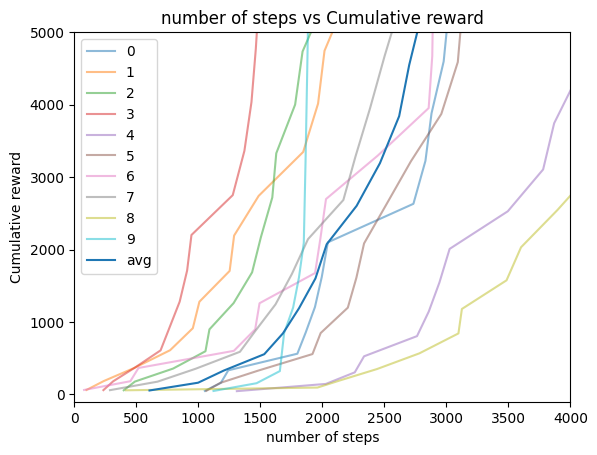

In [120]:
x_data_avg = np.zeros((EPISODES))
y_data_avg = np.zeros((EPISODES))
for i in range(data.keys().__len__()):
    x_data = np.cumsum([value[0] for value in list(data[i].values())])
    y_data = np.cumsum([value[1] for value in list(data[i].values())])
    
    x_data_avg = [sum(x) for x in zip(x_data, x_data_avg)]
    
    y_data_avg = [sum(y) for y in zip(y_data, y_data_avg)]
    
    print(min(y_data))
    plt.plot(x_data, y_data, label=i, alpha=0.5)

x_data_avg = [a/10 for a in x_data_avg]
y_data_avg = [a/10 for a in y_data_avg]

plt.plot(x_data_avg, y_data_avg, label="avg")

# Adding labels and title
plt.xlabel('number of steps')
plt.ylabel('Cumulative reward')
plt.title('number of steps vs Cumulative reward')
plt.ylim(-100,5000)
plt.xlim(0,4000)

plt.legend()

# Display the plot
plt.show()